In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("dataset.csv")

In [2]:
data.dtypes

Index                       int64
pH                        float64
Iron                      float64
Nitrate                   float64
Chloride                  float64
Lead                      float64
Zinc                      float64
Color                      object
Turbidity                 float64
Fluoride                  float64
Copper                    float64
Odor                      float64
Sulfate                   float64
Conductivity              float64
Chlorine                  float64
Manganese                 float64
Total Dissolved Solids    float64
Source                     object
Water Temperature         float64
Air Temperature           float64
Month                      object
Day                       float64
Time of Day               float64
Target                      int64
dtype: object

In [3]:
data.shape

(5956842, 24)

In [4]:
data.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [5]:
missing_values=data.isnull().sum()

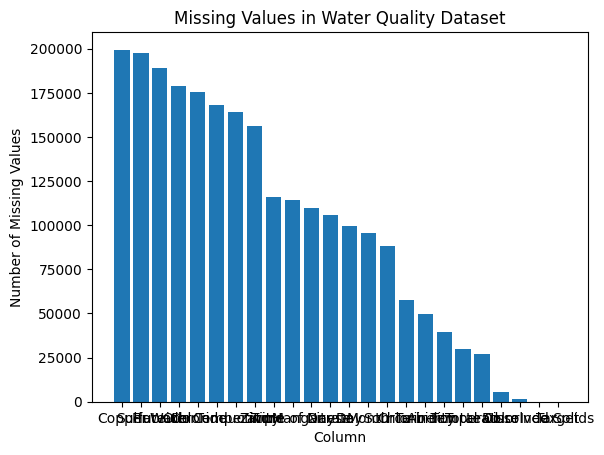

In [6]:
import matplotlib.pyplot as plt
# Sort the missing values by count
missing_values = missing_values.sort_values(ascending=False)

# Create a bar chart of the missing values
plt.bar(missing_values.index, missing_values.values)
plt.xlabel("Column")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values in Water Quality Dataset")
plt.show()

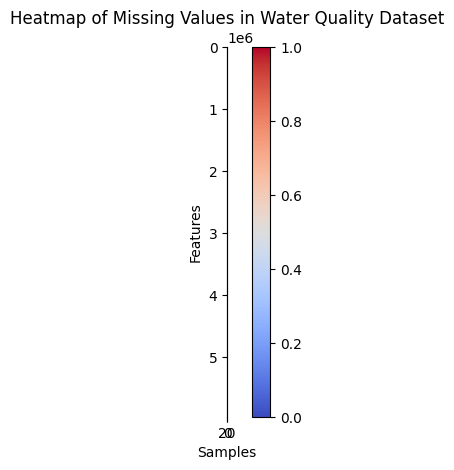

In [7]:
# Create a heatmap of the missing values
plt.imshow(data.isnull(), cmap="coolwarm")
plt.colorbar()
plt.xlabel("Samples")
plt.ylabel("Features")
plt.title("Heatmap of Missing Values in Water Quality Dataset")
plt.show()

In [8]:
# Define columns with missing values and their corresponding strategies
columns_with_missing = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature', 'Day', 'Time of Day']

In [9]:
strategies = {
    'pH': 'mean',
    'Iron': 'median',
    'Nitrate': 'constant',  # Use a specific value for imputation
    'Chloride': 'most_frequent',  # Use the most frequent value for imputation
    'Lead': 'constant',
    'Zinc': 'mean',
    'Turbidity': 'median',
    'Fluoride': 'mean',
    'Copper': 'most_frequent',
    'Odor': 'constant',
    'Sulfate': 'mean',
    'Conductivity': 'median',
    'Chlorine': 'mean',
    'Manganese': 'mean',
    'Total Dissolved Solids': 'mean',
    'Water Temperature': 'constant',
    'Air Temperature': 'mean',
    'Day': 'constant',
    'Time of Day': 'most_frequent'
}

In [10]:
from sklearn.impute import SimpleImputer
#Specify the strategy to be the median class
fea_transformer = SimpleImputer(strategy="median")
values = fea_transformer.fit_transform(data[["pH"]])
pd.DataFrame(values)

,0
0,8.332988
1,6.917863
2,5.443762
3,7.955339
4,8.091909
...,...
5956837,8.418457
5956838,7.950573
5956839,8.145572
5956840,8.273548


In [11]:
for column in columns_with_missing:
    strategy = strategies[column]
    
    if strategy == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif strategy == 'median':
        imputer = SimpleImputer(strategy='median')
    elif strategy == 'most_frequent':
        imputer = SimpleImputer(strategy='most_frequent')
    elif strategy == 'constant':
        imputer = SimpleImputer(strategy='constant', fill_value=-1)  # Replace with appropriate constant value
    
    data[column] = imputer.fit_transform(data[[column]])

print(data)

           Index        pH      Iron    Nitrate    Chloride           Lead  \
0              0  8.332988  0.000083   8.605777  122.799772   3.713298e-52   
1              1  6.917863  0.000081   3.734167  227.029851   7.849262e-94   
2              2  5.443762  0.020106   3.816994  230.995630   5.286616e-76   
3              3  7.955339  0.143988   8.224944  178.129940  3.997118e-176   
4              4  8.091909  0.002167   9.925788  186.540872  4.171069e-132   
...          ...       ...       ...        ...         ...            ...   
5956837  5956837  8.418457  0.000095   8.427576  256.570863   4.751543e-26   
5956838  5956838  7.950573  0.215729   4.677850  292.727780   4.679421e-12   
5956839  5956839  8.145572  0.000005   7.112877  254.831175   3.150254e-56   
5956840  5956840  8.273548  0.001236  10.182408  122.842038   4.226073e-33   
5956841  5956841  7.539523  0.022760   4.902591  106.256430   1.399449e-10   

             Zinc           Color  Turbidity  Fluoride  ...  Ch

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Source']=label_encoder.fit_transform(data['Source'])
data['Month']=label_encoder.fit_transform(data['Month'])
data['Color'] = label_encoder.fit_transform(data['Color'])

In [13]:
data.isnull().sum()

Index                     0
pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Month                     0
Day                       0
Time of Day               0
Target                    0
dtype: int64

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Create a min-max scaler
scaler = MinMaxScaler()

In [16]:
# Fit the scaler to the data
scaler.fit(data)

MinMaxScaler()

In [17]:
# Transform the data
df_norm = scaler.transform(data)

In [18]:
data.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,8,-1.000000,43.493324,4,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,1,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,2,15.348981,71.220586,9,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,2,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,4,11.643467,44.891330,4,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,3,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,1,10.092392,60.843233,0,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,2,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,5,15.249416,69.336671,6,29.0,7.0,0


In [13]:
X = data.drop(columns=["Target"]) 
y = data["Target"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
# Create a Naive Bayes classifier object
nb = GaussianNB()

In [18]:
# Fit the Naive Bayes classifier to the training set
nb.fit(X_train, y_train)

GaussianNB()

In [19]:
# Predict the water quality of the test set
y_pred = nb.predict(X_test)

In [21]:
# Evaluate the accuracy of the predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7244876649447257


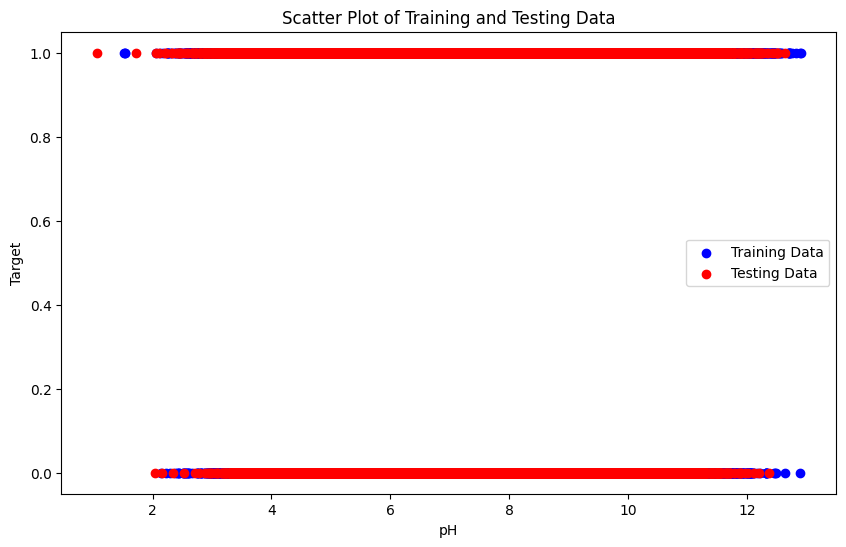

In [25]:
# Create scatter plots of the training and testing data
plt.figure(figsize=(10, 6))
plt.scatter(X_train["pH"], y_train, color="blue", label="Training Data")
plt.scatter(X_test["pH"], y_test, color="red", label="Testing Data")

# Add labels and title
plt.xlabel("pH")
plt.ylabel("Target")
plt.title("Scatter Plot of Training and Testing Data")
plt.legend()
plt.show()

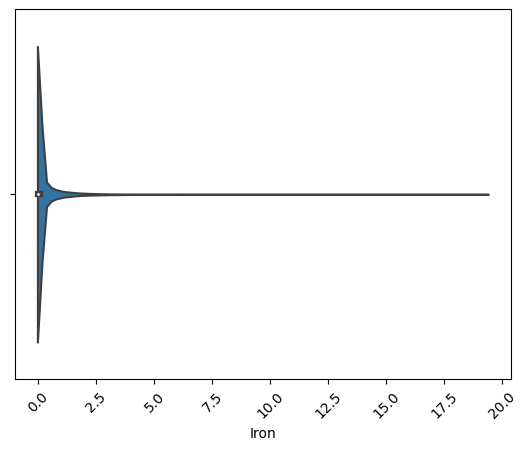

In [29]:
# Create a violin plot of the ph feature
import seaborn as sns
sns.violinplot(x="Iron", data=data)

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)
plt.show()

In [32]:
data.Target.value_counts()

Target
0    4151590
1    1805252
Name: count, dtype: int64

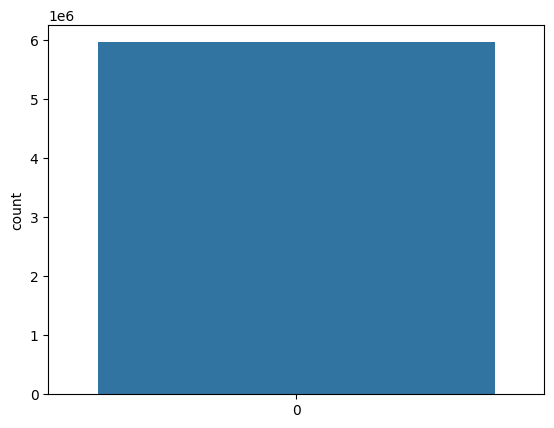

In [34]:
sns.countplot(data['Target'])
plt.show()

/home/u195301/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


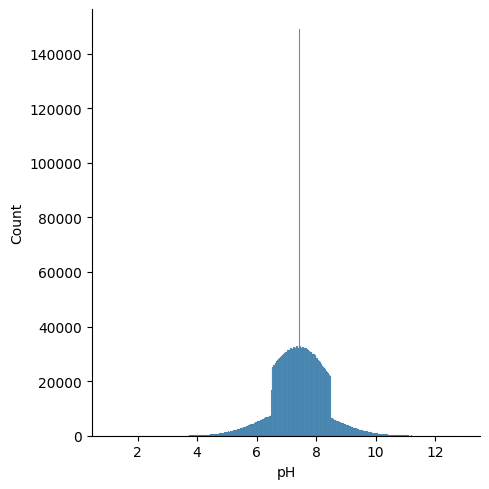

In [35]:
sns.displot(data['pH'])
plt.show()

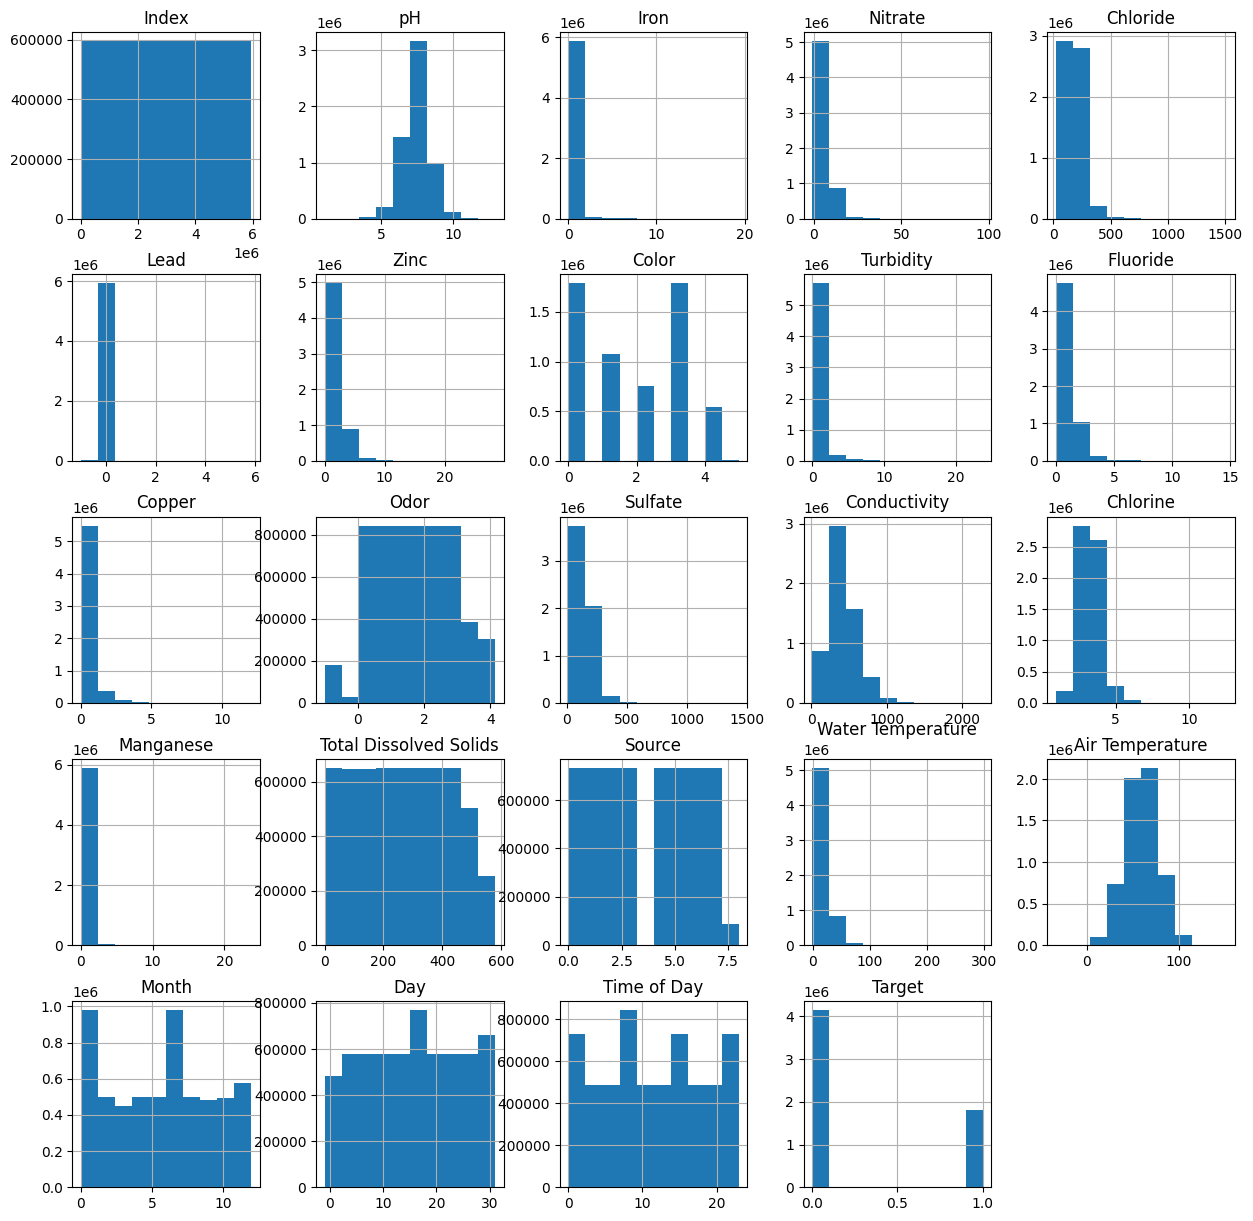

In [37]:
data.hist(figsize=(15,15))
plt.show()

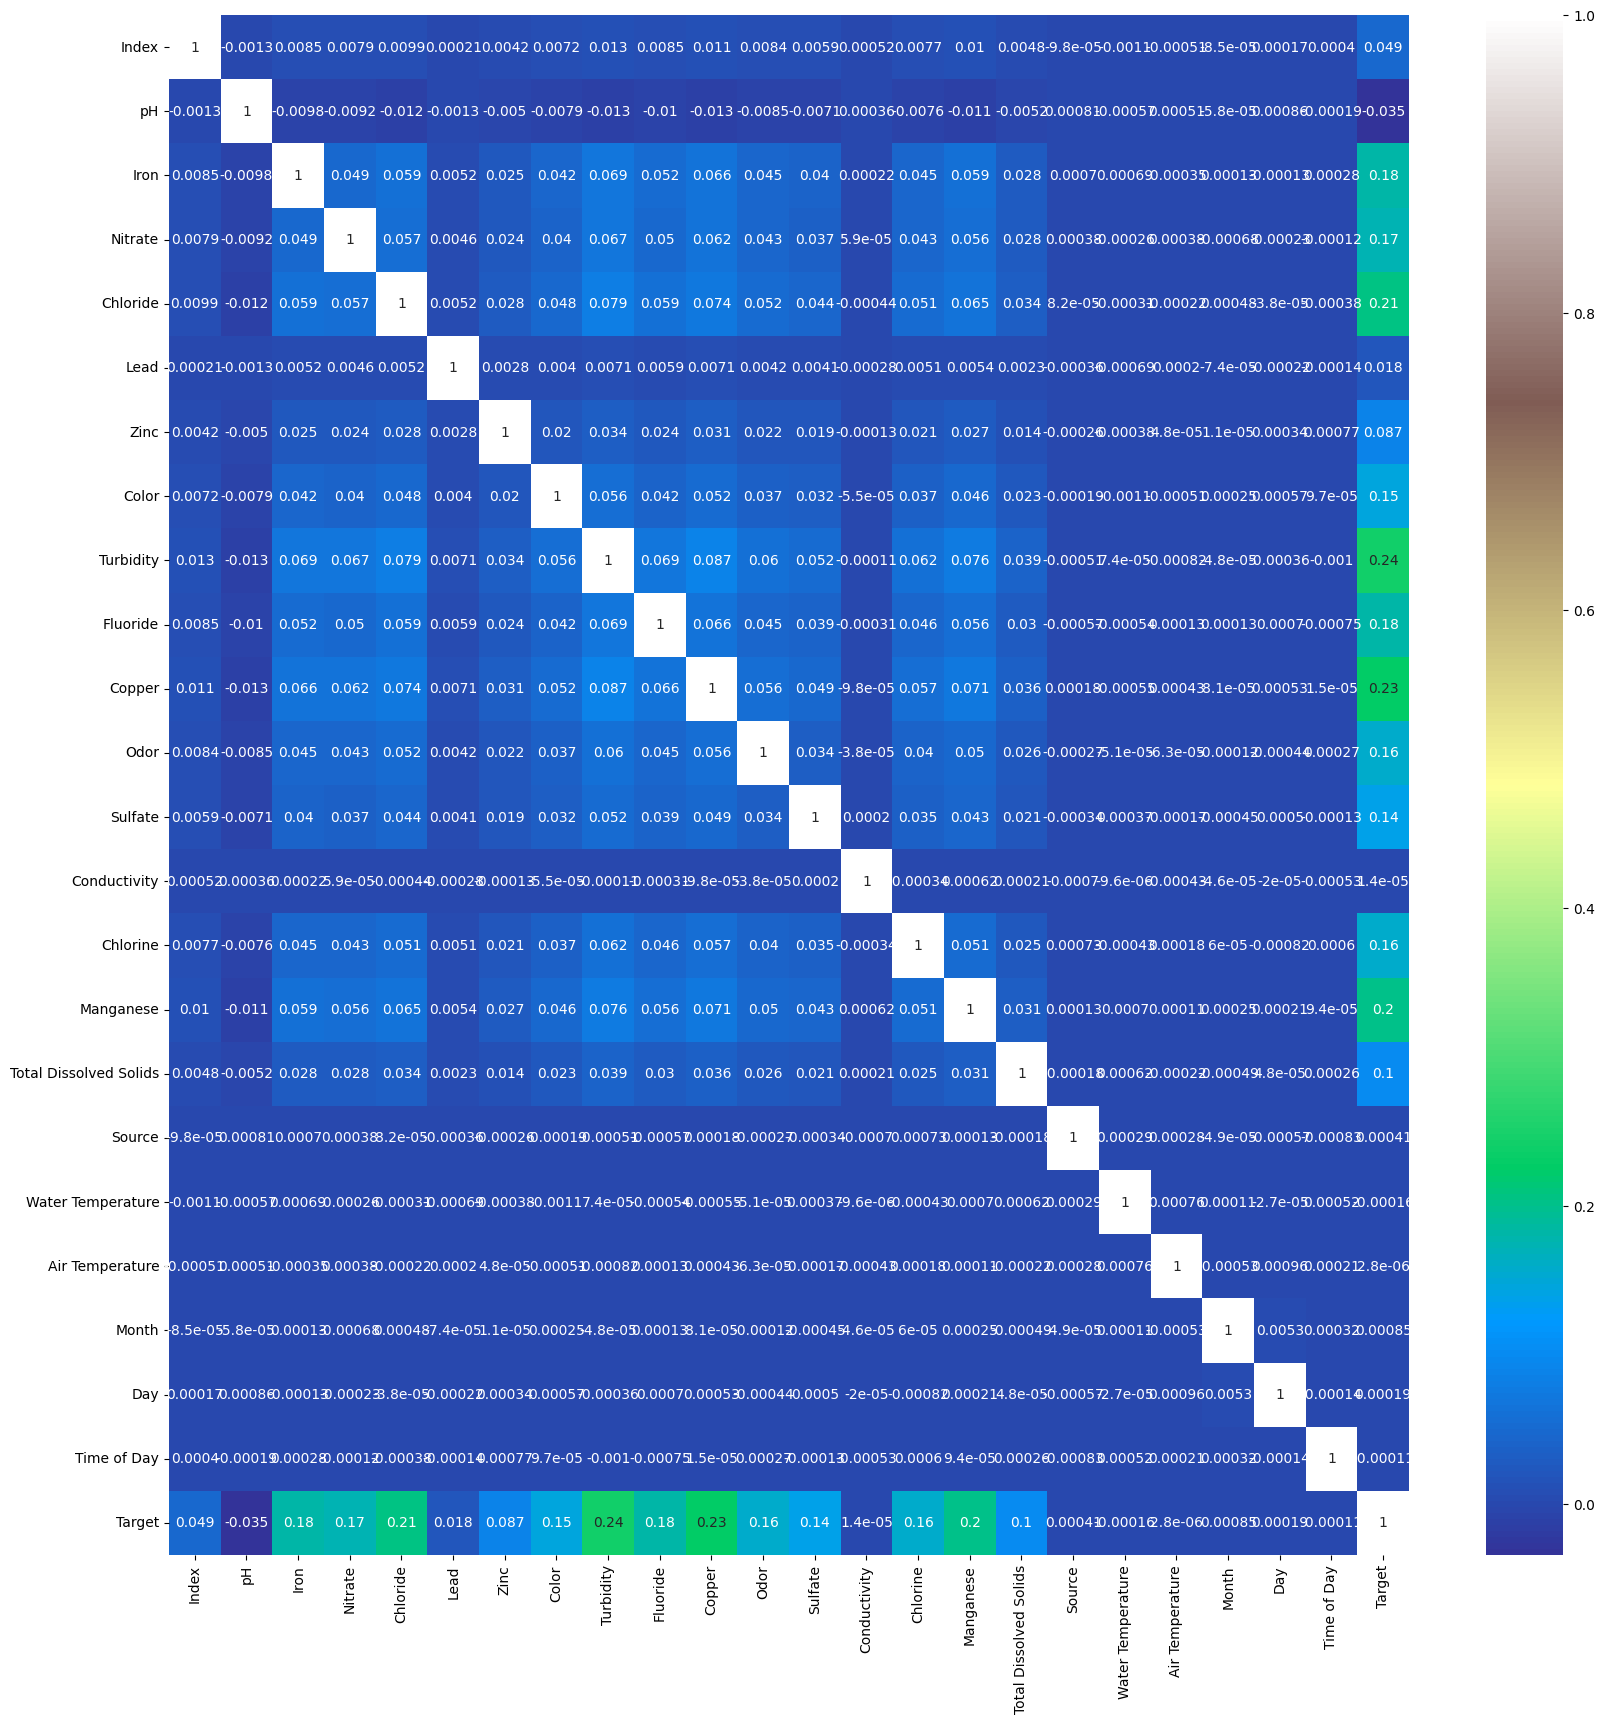

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap="terrain")
plt.show()

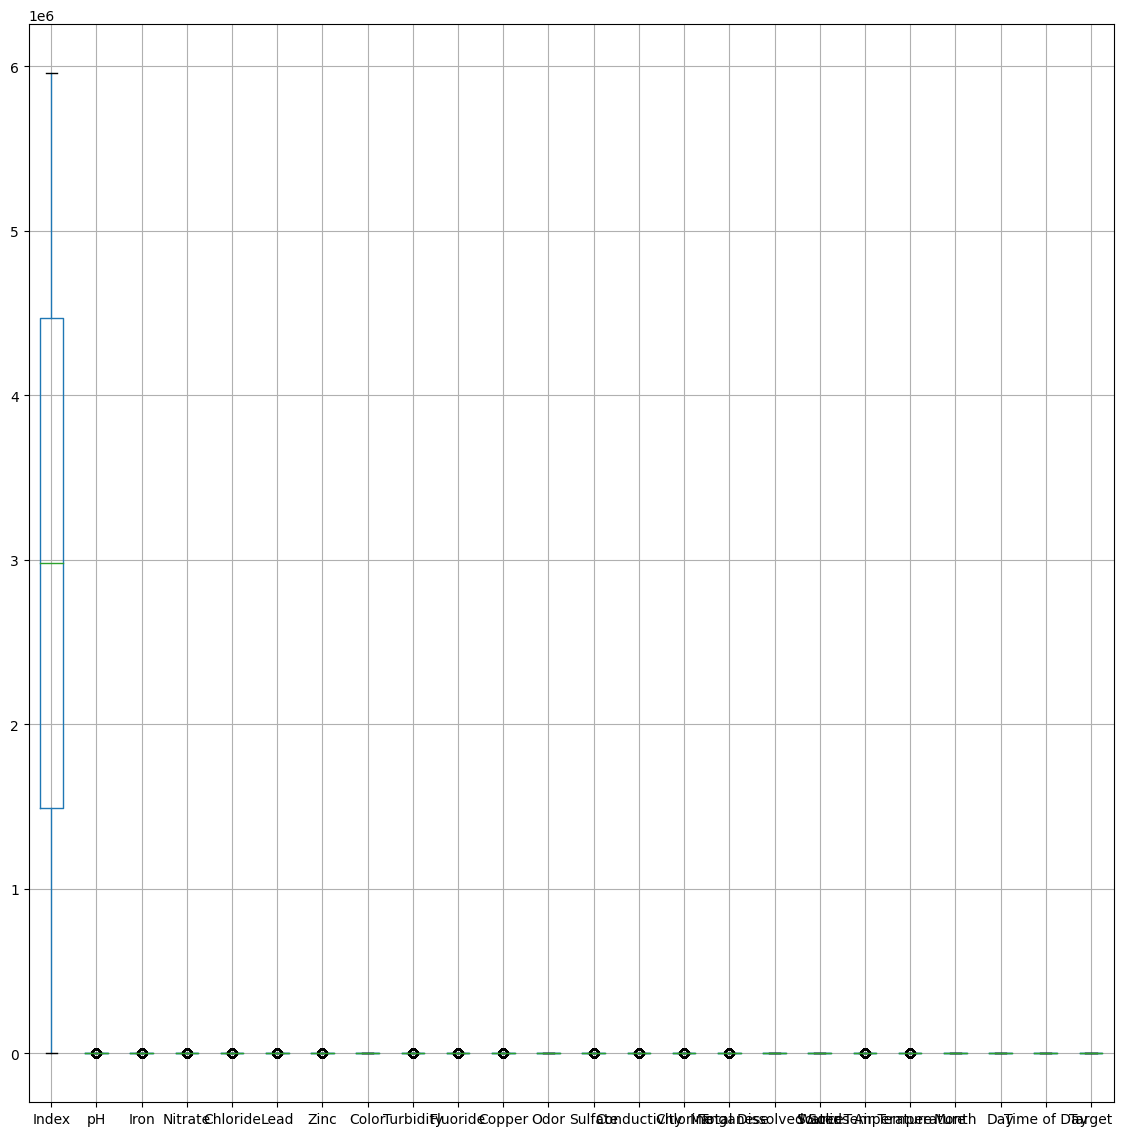

In [43]:
data.boxplot(figsize=(14,14))
plt.show()

In [ ]:
import seaborn as sns
sns.pairplot(data,hue="Target")

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [46]:
dtc=DecisionTreeClassifier(criterion='gini',min_samples_split=100000,splitter='best')

In [47]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=100000)

In [48]:
prediction=dtc.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7244876649447257


In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
# Create an AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=100)

In [57]:
# Fit the AdaBoost classifier to the training data
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [58]:
# Make predictions on the test data
y_pred = adaboost.predict(X_test)

In [59]:
# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9013679055553578


In [60]:
from sklearn.linear_model import ElasticNet

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
# Create an elastic net regression model
model = ElasticNet(alpha=1.0, l1_ratio=0.9)

In [63]:
# Fit the model to the training data
model.fit(X_train, y_train)

ElasticNet(l1_ratio=0.9)

In [64]:
# Predict the water quality of the test set
y_pred = model.predict(X_test)

In [65]:
# Evaluate the model performance
rmse = mean_squared_error(y_test, y_pred)
print("RMSE:", rmse)

RMSE: 0.19698968221693777


In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
# Create a GBM classifier
gbm = GradientBoostingClassifier()

In [20]:
import lightgbm as lgb

# Create a LightGBM classifier
gbm = lgb.LGBMClassifier(
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=10,
    min_child_samples=20,
    reg_alpha=0.1,
    reg_lambda=0.1,
)

In [19]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Train the classifier on the training data
gbm.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1353726, number of negative: 3113905
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.408802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4675
[LightGBM] [Info] Number of data points in the train set: 4467631, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.303008 -> initscore=-0.833017
[LightGBM] [Info] Start training from score -0.833017


LGBMClassifier(learning_rate=0.01, max_depth=10, n_estimators=1000,
               reg_alpha=0.1, reg_lambda=0.1)

In [22]:
# Make predictions on the test data
y_pred = gbm.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [26]:
# Evaluate the model performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9858341094713913


In [27]:
import xgboost as xgb

In [32]:
# Create a gradient boosting model
gbm = xgb.XGBClassifier(
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=10,
    min_child_samples=20,
    reg_alpha=0.1,
    reg_lambda=0.1,
)

In [33]:
# Train the model on the training data
gbm.fit(X_train, y_train)

[20:05:28] WARNING: /home/sat_bot/base/conda-bld/xgboost_1677515375243/work/src/learner.cc:768: 
Parameters: { "min_child_samples" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_samples=20, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [34]:
# Make predictions on the test data
y_pred = gbm.predict(X_test)

In [35]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9975342647885357


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
# Create the logistic regression model
model = LogisticRegression()

In [20]:
# Fit the logistic regression model to the training set
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Evaluate the logistic regression model on the test set
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6968018635371348


In [16]:
fifth=data.iloc[5]
print(fifth)

Index                     5.000000e+00
pH                        7.445373e+00
Iron                      6.438211e-06
Nitrate                   1.702584e+00
Chloride                  1.628285e+02
Lead                      6.102202e-23
Zinc                      3.742464e+00
Color                     3.000000e+00
Turbidity                 5.047907e-01
Fluoride                  5.456246e-02
Copper                    8.513263e-01
Odor                      1.270483e+00
Sulfate                   4.085340e+01
Conductivity              2.733597e+02
Chlorine                  3.957842e+00
Manganese                 2.863952e-04
Total Dissolved Solids    3.656390e+02
Source                    6.000000e+00
Water Temperature         1.396684e+01
Air Temperature           4.544480e+01
Month                     7.000000e+00
Day                       1.800000e+01
Time of Day               1.600000e+01
Target                    0.000000e+00
Name: 5, dtype: float64


In [24]:
input_data=(5.000000e+00,7.445373e+00,6.438211e-06,1.702584e+00,1.628285e+02,6.102202e-23,3.742464e+00,3.000000e+00,5.047907e-01,5.456246e-02,8.513263e-01,1.270483e+00, 4.085340e+01,2.733597e+02,3.957842e+00,2.863952e-04,3.656390e+02,6.000000e+00,1.396684e+01,4.544480e+0,17.000000e+00,1.800000e+01,1.600000e+01)

#changing the input-data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the np array as we predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
    print("Water is pure")
else:
    print("Water is not pure")

[0]
Water is not pure


/home/u195301/.local/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
